In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


2021-11-21 23:33:47.254926: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
df = pd.read_csv('HepatitisCdata.csv')
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [3]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)
df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,1,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Text(0.5, 0, 'GGT')

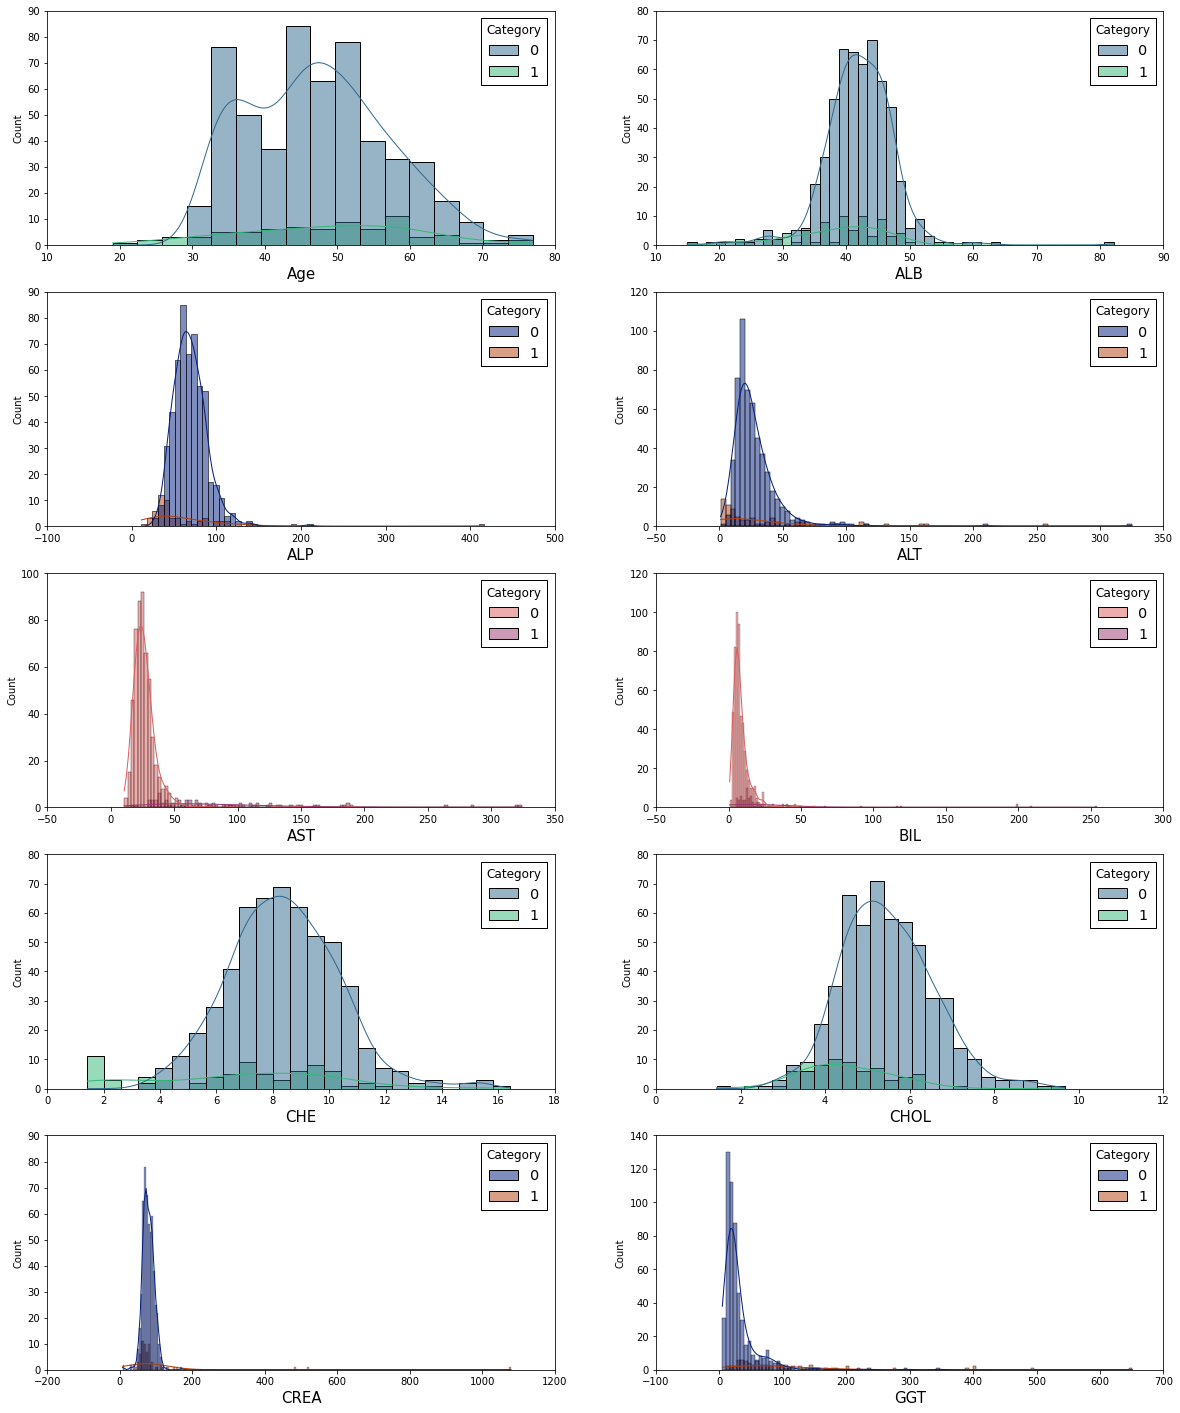

In [5]:
fig, ax = plt.subplots(5,2, figsize=(20,25)) 
plt.style.use("classic")


sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0])
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1])
ax[0,1].set_xlabel("ALB",fontsize=15)

sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0])
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1])
ax[1,1].set_xlabel("ALT",fontsize=15)

sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0])
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1])
ax[2,1].set_xlabel("BIL",fontsize=15)

sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0])
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1])
ax[3,1].set_xlabel("CHOL",fontsize=15)

sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0])
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1])
ax[4,1].set_xlabel("GGT",fontsize=15)

<AxesSubplot:>

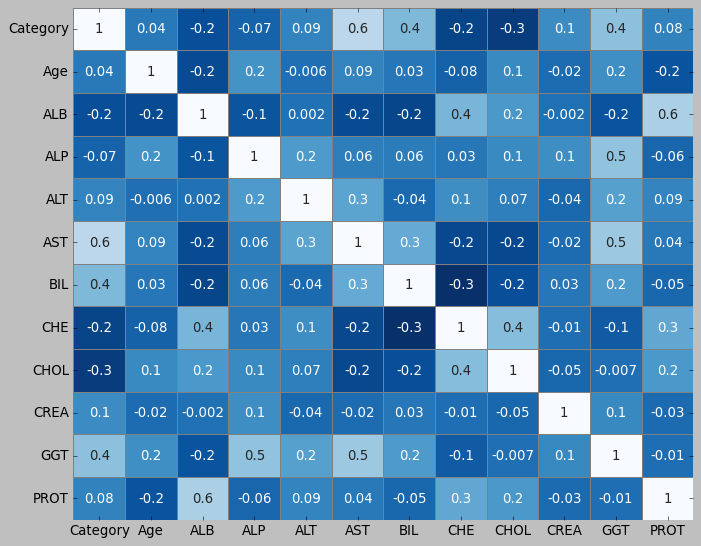

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey')

In [7]:
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [8]:
df.dropna(inplace=True)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,1,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,1,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [9]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,1,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,1,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [10]:
X = df.drop(columns='Category')
y = df['Category']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
os = SMOTE(sampling_strategy='minority',random_state = 1,k_neighbors=4)
train_smote_X,train_smote_Y = os.fit_resample(X_train,y_train)
X_train = pd.DataFrame(data = train_smote_X, columns=X_train.columns)
y_train = pd.DataFrame(data = train_smote_Y)

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        17

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



/home/meraj/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       101
           1       0.81      0.76      0.79        17

    accuracy                           0.94       118
   macro avg       0.89      0.87      0.88       118
weighted avg       0.94      0.94      0.94       118



/home/meraj/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [16]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        17

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



/home/meraj/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
model = Sequential()
model.add(Dense(16, activation='swish')) # First hidden layer
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) # Output layer

2021-11-21 23:33:57.303923: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-21 23:33:57.305222: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-21 23:33:57.343078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 23:33:57.343454: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce 940M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 3 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 13.41GiB/s
2021-11-21 23:33:57.343493: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-11-21 23:33:57.345206: I tensorflow/stream_executor/platform/default/dso_loa

In [18]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size=32, epochs=50)

2021-11-21 23:37:15.103341: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-21 23:37:15.125302: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/50


2021-11-21 23:37:15.546041: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


27/27 [==============================] - 1s 21ms/step - loss: 0.7501 - accuracy: 0.4242 - val_loss: 0.7082 - val_accuracy: 0.4576
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.5921 - val_loss: 0.6489 - val_accuracy: 0.6441
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.6475 - val_loss: 0.6048 - val_accuracy: 0.7542
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 0.5899 - accuracy: 0.7227 - val_loss: 0.5586 - val_accuracy: 0.8220
Epoch 5/50
27/27 [==============================] - 0s 5ms/step - loss: 0.5436 - accuracy: 0.7882 - val_loss: 0.5200 - val_accuracy: 0.8559
Epoch 6/50
27/27 [==============================] - 0s 6ms/step - loss: 0.4939 - accuracy: 0.8372 - val_loss: 0.4808 - val_accuracy: 0.8898
Epoch 7/50
27/27 [==============================] - 0s 6ms/step - loss: 0.4677 - accuracy: 0.8421 - val_loss: 0.4462 - val_accuracy: 0.9153
Epoch 8/50
27/27 [============

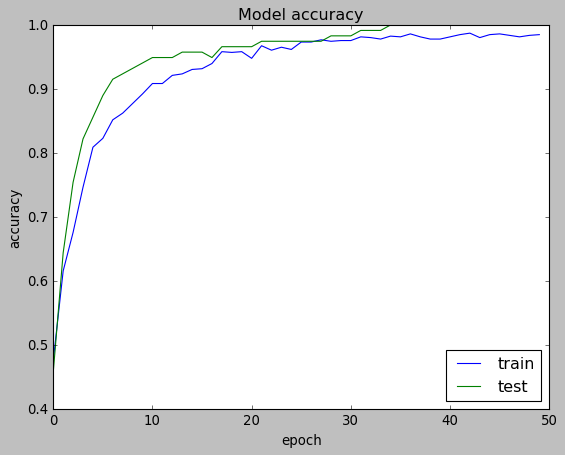

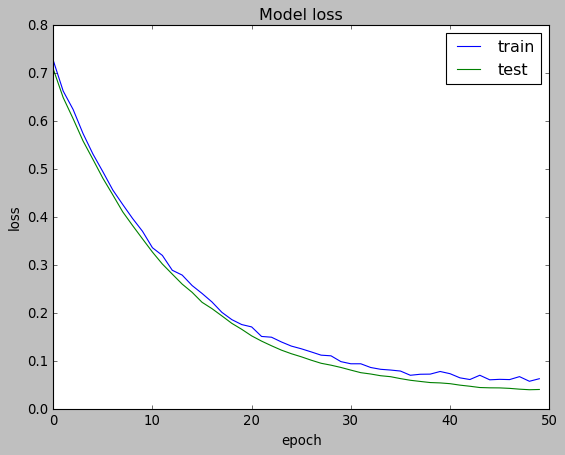

In [20]:
# summarize history for acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
